# **MC-321 LAB ASSIGNMENT - 5**
### **DHARMESH KOTA**
### **ID: 202203038**

## **Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import plotly.express as px

# **Question 1**  
Learn a Naïve-Bayes binary classifier on the dataset generated using the following data sampling:  

1. Draw 50 random samples from $ N(5, 20) $.  
2. Draw 50 random samples from $ N(11, 10) $.  
3. Draw 50 random samples from $ N(20, 8) $.  

Consider the mean and variance of two classes as:  

- **Class 1:** $ \mu = 8 $, $ \sigma^2 = 20 $  
- **Class 2:** $ \mu = 16 $, $ \sigma^2 = 25 $  

Classify using the Naïve-Bayes classifier:  

- Assume a priori probabilities as $ (0.5, 0.5) $, $ (0.3, 0.7) $, and $ (0.7, 0.3) $.  
- Visualize data and class by plotting a histogram.  
- Apply Laplace smoothing for computing the conditional probabilities:  

$$
P(X = x \mid \text{class} = c) = \frac{\text{number of examples with } X = x \text{ and class} = c + \alpha}{N + \alpha \cdot K}
$$

where $ N $ is the total number of examples from class $ c $, $ K $ is the number of values taken by the feature \( X \), and  $ \alpha $ is the smoothing parameter (typically $ \alpha = 1 $).  

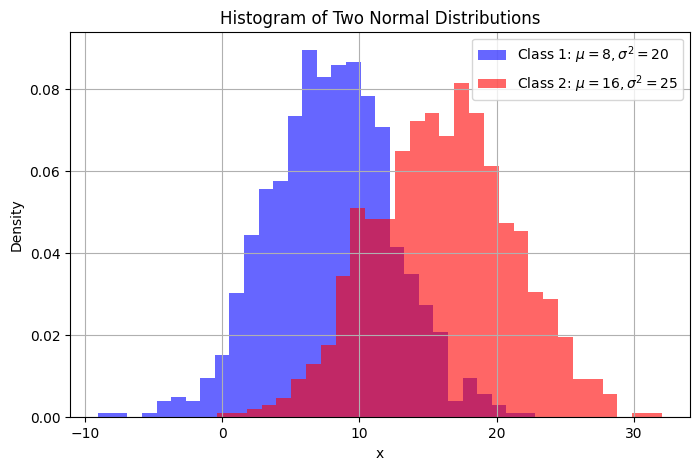

In [ ]:
# Plotting Histograms for Two Normal Distributions

np.random.seed(50)

mean_class1 = 8
variance_class1 = 20
std_class1 = np.sqrt(variance_class1)

mean_class2 = 16
variance_class2 = 25
std_class2 = np.sqrt(variance_class2)

samples_class1 = np.random.normal(loc=mean_class1, scale=std_class1, size=1000)
samples_class2 = np.random.normal(loc=mean_class2, scale=std_class2, size=1000)

plt.figure(figsize=(8, 5))

plt.hist(samples_class1, bins=30, alpha=0.6, color="blue", density=True,
         label="Class 1: $\mu=8, \sigma^2=20$")

plt.hist(samples_class2, bins=30, alpha=0.6, color="red", density=True,
         label="Class 2: $\mu=16, \sigma^2=25$")

plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of Two Normal Distributions")
plt.legend()
plt.grid(True)
plt.show()

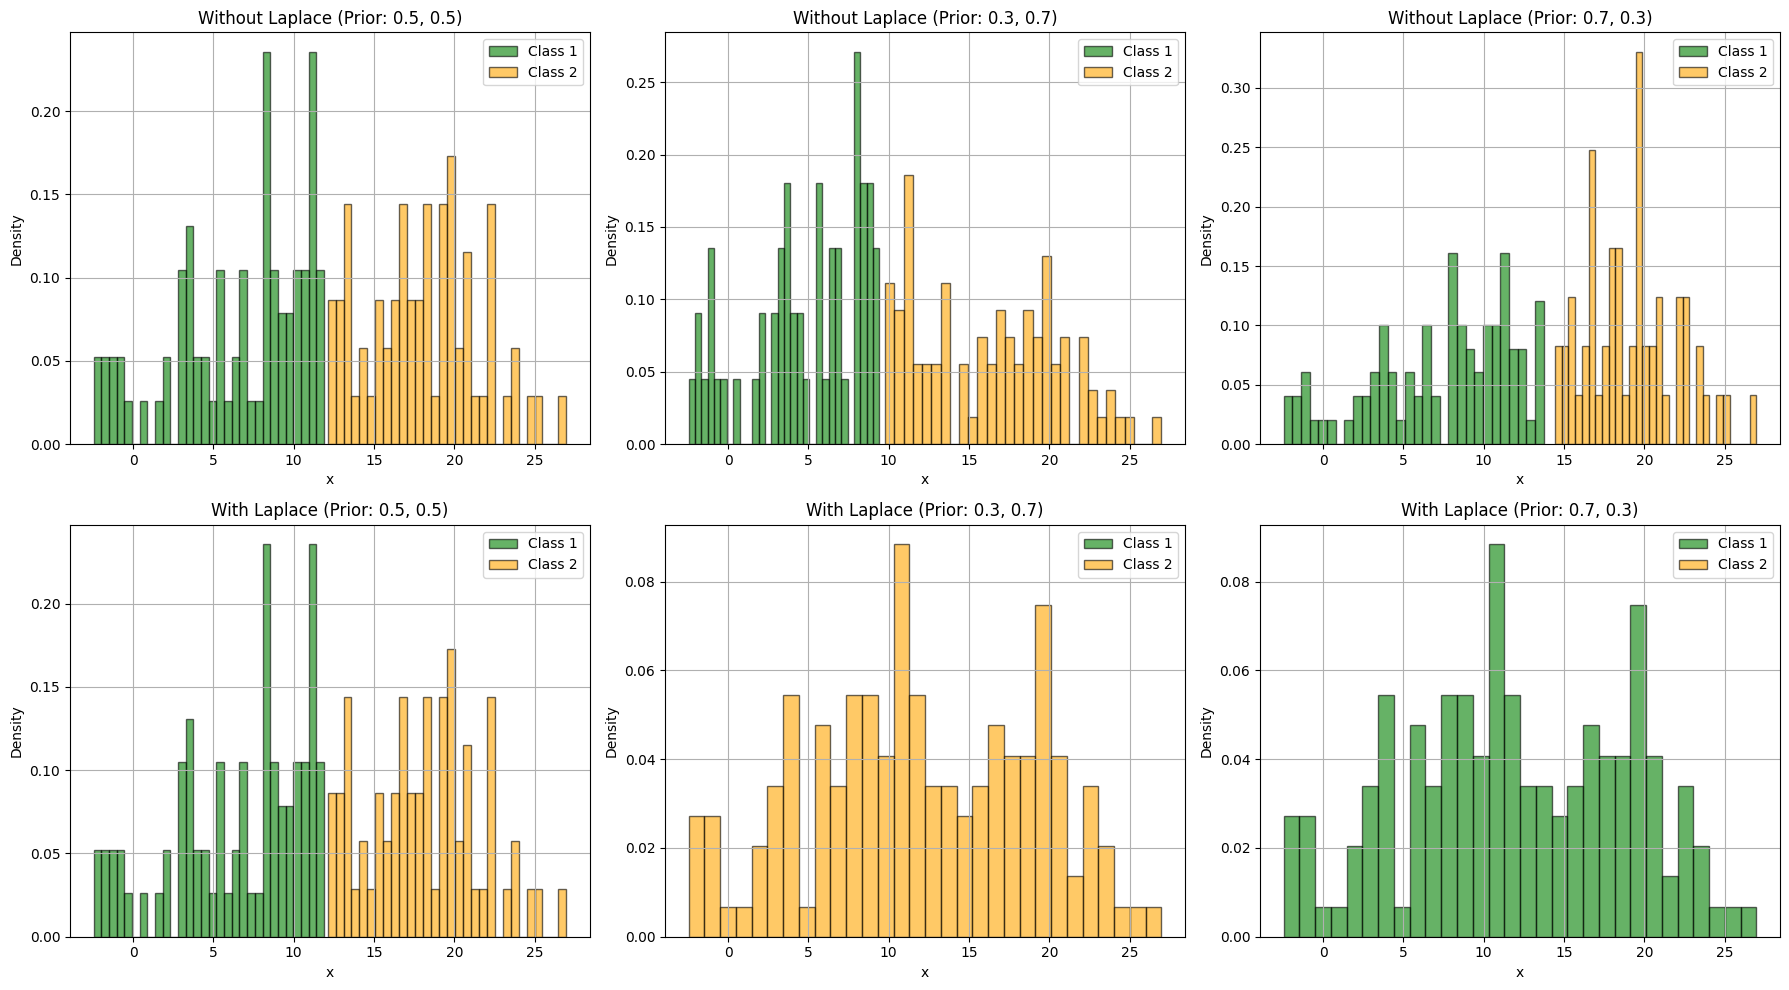

In [ ]:
# Classification with and without Laplace Smoothing
np.random.seed(50)

# Generating Samples from Three Different Distributions
samples_group1 = np.random.normal(loc=5, scale=np.sqrt(20), size=50)
samples_group2 = np.random.normal(loc=11, scale=np.sqrt(10), size=50)
samples_group3 = np.random.normal(loc=20, scale=np.sqrt(8), size=50)

all_samples = np.concatenate([samples_group1, samples_group2, samples_group3])

prior_probability_pairs = [(0.5, 0.5), (0.3, 0.7), (0.7, 0.3)]

laplace_alpha = 1
num_bins = 30

fig, axes = plt.subplots(nrows=2, ncols=len(prior_probability_pairs), figsize=(18, 10))

for index, (prior_class1, prior_class2) in enumerate(prior_probability_pairs):
    likelihood_class1 = norm.pdf(all_samples, loc=mean_class1, scale=std_class1)
    likelihood_class2 = norm.pdf(all_samples, loc=mean_class2, scale=std_class2)

    posterior_class1 = likelihood_class1 * prior_class1
    posterior_class2 = likelihood_class2 * prior_class2
    assigned_labels = np.where(posterior_class1 > posterior_class2, 1, 2)

    ax_without = axes[0, index]
    ax_without.hist(all_samples[assigned_labels == 1], bins=num_bins, alpha=0.6,
                    color="green", edgecolor="black", density=True, label="Class 1")
    ax_without.hist(all_samples[assigned_labels == 2], bins=num_bins, alpha=0.6,
                    color="orange", edgecolor="black", density=True, label="Class 2")
    ax_without.set_xlabel("x")
    ax_without.set_ylabel("Density")
    ax_without.set_title(f"Without Laplace (Prior: {prior_class1}, {prior_class2})")
    ax_without.legend()
    ax_without.grid(True)

    # Classification With Laplace Smoothing
    num_samples_assumed = len(all_samples) // 2

    smoothed_likelihood_class1 = (likelihood_class1 + laplace_alpha) / (num_samples_assumed + laplace_alpha * num_bins)
    smoothed_likelihood_class2 = (likelihood_class2 + laplace_alpha) / (num_samples_assumed + laplace_alpha * num_bins)

    posterior_class1_smoothed = smoothed_likelihood_class1 * prior_class1
    posterior_class2_smoothed = smoothed_likelihood_class2 * prior_class2
    assigned_labels_smoothed = np.where(posterior_class1_smoothed > posterior_class2_smoothed, 1, 2)

    ax_with = axes[1, index]
    ax_with.hist(all_samples[assigned_labels_smoothed == 1], bins=num_bins, alpha=0.6,
                 color="green", edgecolor="black", density=True, label="Class 1")
    ax_with.hist(all_samples[assigned_labels_smoothed == 2], bins=num_bins, alpha=0.6,
                 color="orange", edgecolor="black", density=True, label="Class 2")
    ax_with.set_xlabel("x")
    ax_with.set_ylabel("Density")
    ax_with.set_title(f"With Laplace (Prior: {prior_class1}, {prior_class2})")
    ax_with.legend()
    ax_with.grid(True)

plt.tight_layout()
plt.show()

Laplace smoothing is not performing effectively in this case because it is specifically designed for discrete probability density functions (PDFs). To achieve better performance, alternative methods like logarithmic probabilities might be more appropriate, as they are better suited for handling small probability values. When the prior probabilities are equal, Laplace smoothing results in outcomes that are identical to those without smoothing. This is because equal priors essentially neutralize the effect of smoothing. However, when the priors are unequal, the multiplication of a smaller probability with a larger one can lead to underfitting. This occurs because the smaller probability becomes disproportionately influential, thereby distorting the overall model and leading to poorer predictive performance.

# **Question 2**  
Consider the Iris flower dataset that contains a set of 150 samples, which consists of 50 samples from each of three  
species of Iris: setosa (label 0), versicolor (label 1), and virginica (label 2). Each sample was measured in four  
features: sepal length, sepal width, petal length, and petal width.  

## **Data Preparation and Visualization:**  
- Split the dataset into a balanced (with respect to the labels) training and test set, containing respectively  
  80% and 20% of the dataset.  

## **Perceptron Learning:**  
Consider the Iris flower dataset.  

- Visualize the first two features of the training set, i.e., sepal length and sepal width, and their corresponding  
  labels/classes.  
- Now consider only the dataset containing two classes: setosa and versicolor.  
- Classify the dataset into two classes with the Perceptron. Report the training and test errors. Comment.  


Initial Iris Dataset Sample:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Modified Iris Dataset Sample:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


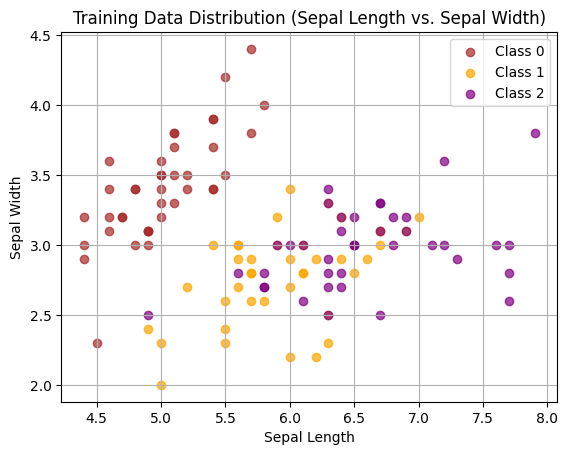

In [ ]:
# Visualizing Iris Data Distribution (2D Scatter Plot)

iris_df = pd.read_csv("Iris.csv")

print("Initial Iris Dataset Sample:")
print(iris_df.head())

iris_df = iris_df.iloc[:, 1:]

species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}
iris_df['Species'] = iris_df['Species'].map(species_mapping)

print("\nModified Iris Dataset Sample:")
print(iris_df.head())

iris_data_array = iris_df.to_numpy()

class_0_data = iris_data_array[:50, :]
class_1_data = iris_data_array[50:100, :]
class_2_data = iris_data_array[100:150, :]

train_class_0, test_class_0 = train_test_split(class_0_data, test_size=0.2, random_state=42)
train_class_1, test_class_1 = train_test_split(class_1_data, test_size=0.2, random_state=42)
train_class_2, test_class_2 = train_test_split(class_2_data, test_size=0.2, random_state=42)

train_data_combined = np.vstack((train_class_0, train_class_1, train_class_2))
test_data_combined = np.vstack((test_class_0, test_class_1, test_class_2))

np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)

def plot_2d_data_distribution(data, plot_title):
    color_mapping = {0: 'brown', 1: 'orange', 2: 'purple'}

    for class_label, color in color_mapping.items():
        class_subset = data[data[:, -1] == class_label]
        plt.scatter(class_subset[:, 0], class_subset[:, 1], color=color, alpha=0.7,
                    label=f'Class {class_label}')

    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(plot_title)
    plt.legend()
    plt.grid(True)
    plt.show()

train_data_np = np.array(train_data_combined)
plot_2d_data_distribution(train_data_np, "Training Data Distribution (Sepal Length vs. Sepal Width)")

In [ ]:
# Perceptron Classification on a Binary Iris Dataset

iris_df = pd.read_csv("Iris.csv")
iris_df = iris_df.iloc[:, 1:]
species_to_num = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
iris_df["Species"] = iris_df["Species"].map(species_to_num)
iris_binary = iris_df[iris_df["Species"] != 2]
iris_data = iris_binary.to_numpy()

features = iris_data[:, :-1]
labels = iris_data[:, -1]

labels = np.where(labels == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, stratify=labels, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_with_bias = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_with_bias = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

def train_perceptron(features, targets, learning_rate=0.01, max_epochs=1000):
    num_samples, num_features = features.shape
    weights = np.zeros(num_features)

    for epoch in range(max_epochs):
        error_count = 0

        for i in range(num_samples):
            linear_output = np.dot(features[i], weights)
            prediction = np.sign(linear_output)
            if prediction != targets[i]:
                weights += learning_rate * targets[i] * features[i]
                error_count += 1

        if error_count == 0:
            print(f"Convergence reached after {epoch+1} epochs.")
            break

    return weights

perceptron_weights = train_perceptron(X_train_with_bias, y_train, learning_rate=0.01, max_epochs=1000)

def predict_perceptron(features, weights):
    linear_output = np.dot(features, weights)
    predictions = np.sign(linear_output)
    return predictions

train_predictions = predict_perceptron(X_train_with_bias, perceptron_weights)
test_predictions = predict_perceptron(X_test_with_bias, perceptron_weights)

num_train_errors = np.sum(train_predictions != y_train)
num_test_errors = np.sum(test_predictions != y_test)

train_error_pct = (num_train_errors / len(y_train)) * 100
test_error_pct = (num_test_errors / len(y_test)) * 100

print(f"Training Error: {num_train_errors} samples misclassified ({train_error_pct:.2f}%)")
print(f"Test Error: {num_test_errors} samples misclassified ({test_error_pct:.2f}%)")

Convergence reached after 2 epochs.
Training Error: 0 samples misclassified (0.00%)
Test Error: 0 samples misclassified (0.00%)


# **Question 3**  
Perform binary classification using logistic regression on the data in the file `Social Network Ads.csv`, which is a  
categorical dataset to determine whether a user purchased a product or not by using three features.  

1. Visualize the data by 3D plotting features using different colors for label 0 and 1.  
2. Plot the training data, test data, and decision boundary learned by logistic regression in the same figure. (The  
   boundary should be a straight line separating the region where $ h_w(x) > 0.5 $ from the region where  
   $ h_w(x) \leq 0.5 $
   $( h_w(x^{(i)}) = \sigma(w^T x^{(i)}) ))$ for the above three results.  
3. Use 90% of the data points for training and the remaining 10% for testing the accuracy of classification.  
4. Using the confusion matrix, find accuracy, precision, F1 score, and recall.  


In [ ]:
# 3D Scatter Plot of Social Network Ads Using Plotly

ads_df = pd.read_csv("Social_Network_Ads.csv")
ads_df = ads_df.iloc[:, 1:]
ads_df["Gender"] = ads_df["Gender"].map({"Male": 0, "Female": 1})
ads_df["Purchased_Label"] = ads_df["Purchased"].map({0: "Not Purchased", 1: "Purchased"})

fig = px.scatter_3d(
    ads_df,
    x="Age",
    y="EstimatedSalary",
    z="Gender",
    color="Purchased_Label",
    color_discrete_map={"Not Purchased": "#FF5733", "Purchased": "#2ECC71"},
    symbol="Purchased_Label",
    symbol_map={"Not Purchased": "circle", "Purchased": "diamond"},
    title="<b>3D Scatter Plot of Social Network Ads</b>",
    labels={
        "Age": "<b>Age (years)</b>",
        "EstimatedSalary": "<b>Estimated Salary ($)</b>",
        "Gender": "<b>Gender</b> (0 = Male, 1 = Female)",
        "Purchased_Label": "<b>Purchase Status</b>"
    },
    opacity=0.85
)

fig.update_layout(
    scene=dict(
        xaxis=dict(title="<b>Age</b>", backgroundcolor="rgba(200, 200, 200, 0.2)"),
        yaxis=dict(title="<b>Estimated Salary</b>", backgroundcolor="rgba(200, 200, 200, 0.2)"),
        zaxis=dict(title="<b>Gender</b>", backgroundcolor="rgba(200, 200, 200, 0.2)"),
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(title="<b>Purchase Status</b>", x=0.8, y=1),
)

fig.show()

<ipython-input-21-ff8ff65c6d12>:25: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



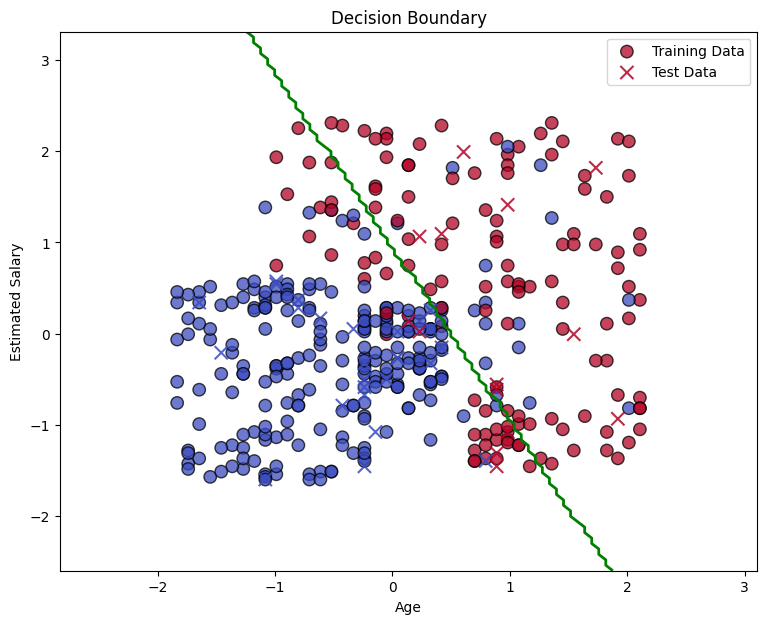

In [ ]:
# Logistic Regression on Social Network Ads with Decision Boundary

ads_df = pd.read_csv("Social_Network_Ads.csv")
ads_df = ads_df.drop(columns=["Gender"])

X = ads_df[["Age", "EstimatedSalary"]].values
y = ads_df["Purchased"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

plt.figure(figsize=(9, 7))

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
            c=y_train, cmap="coolwarm", marker="o", edgecolors="black", s=80,
            label="Training Data", alpha=0.75)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
            c=y_test, cmap="coolwarm", marker="x", edgecolors="black", s=90,
            label="Test Data", alpha=0.85)


x0_min, x0_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
x1_min, x1_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
x0_grid, x1_grid = np.meshgrid(np.linspace(x0_min, x0_max, 100),
                               np.linspace(x1_min, x1_max, 100))

grid_points = np.c_[x0_grid.ravel(), x1_grid.ravel()]
grid_predictions = logistic_model.predict(grid_points)
grid_predictions = grid_predictions.reshape(x0_grid.shape)

plt.contour(x0_grid, x1_grid, grid_predictions, levels=[0.5], colors="green", linewidths=2)

plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Decision Boundary")
plt.legend()
plt.show()

In [ ]:
# Evaluating the Logistic Regression Model

y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}\n")

print("Training Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

Train Accuracy: 0.8417
Test Accuracy: 0.8750
Train F1 Score: 0.7595
Test F1 Score: 0.7826

Train Confusion Matrix:
[[213  18]
 [ 39  90]]

Test Confusion Matrix:
[[26  0]
 [ 5  9]]
